# Authors : Vamshi 
Created : 30-Oct-2022

Warehouse Inventory Management and Analysis

The solution is divided into the following sections:

Data understanding and exploration
Data cleaning
Data preparation
Model building and evaluation

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading Training data 

df=pd.read_csv("C:\\Users\\vamsi\\OneDrive\\Desktop\\Vamshi Data\\Supplychain train dataset.csv")
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [3]:
#loading Testing data 

df1=pd.read_excel("C:\\Users\\vamsi\\Downloads\\Supply chain test dataset (1).xlsx")
df1.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,WH_122250,EID_72250,Rural,Large,North,Zone 6,7,0,2,5397,...,0,1,75,30.0,2019.0,9,1,A,1,29
1,WH_122251,EID_72251,Rural,Large,North,Zone 6,8,2,2,5183,...,0,0,138,20.0,2006.0,25,0,A,4,23
2,WH_122252,EID_72252,Rural,Large,North,Zone 6,3,0,4,4665,...,0,1,188,34.0,NaN,24,0,B,4,23
3,WH_122253,EID_72253,Rural,Mid,North,Zone 2,2,0,3,5196,...,0,1,156,31.0,NaN,15,0,A,4,1
4,WH_122254,EID_72254,Rural,Mid,North,Zone 2,5,2,4,8275,...,0,1,237,NaN,NaN,21,1,B+,2,12


In [4]:
#Checking missing values on TEST data:

df1.isnull().sum().T

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      110
wh_est_year                     1288
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     101
wh_breakdown_l3m                   0
govt_check_l3m                     0
dtype: int64

In [5]:
#Checking missing values on Train data:

df.isnull().sum().T

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       877
wh_est_year                     10545
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      805
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [6]:
df1.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m'],
      dtype='object')

# Missing Values Imputation on test data: 

In [7]:
df1['workers_num'].fillna(df1['workers_num'].median(),inplace=True)

In [8]:
df1['workers_num'].median()

28.0

In [9]:
df1['wh_est_year'].fillna(df1['wh_est_year'].median(),inplace=True)

In [10]:
df1['wh_est_year'].median()

2009.0

In [11]:
df1['approved_wh_govt_certificate'].fillna(df1['approved_wh_govt_certificate'].mode()[0],inplace=True)

In [12]:
df1['approved_wh_govt_certificate'].mode()

0    C
dtype: object

In [13]:
df1.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
dtype: int64

In [14]:
df1.shape

(2750, 23)

# Missing Values Imputation on train data:

In [15]:
df['workers_num'].fillna(df['workers_num'].median(),inplace=True)

In [16]:
df['workers_num'].median()

28.0

In [17]:
df['wh_est_year'].fillna(df['wh_est_year'].median(),inplace=True)
df['wh_est_year'].median()

2009.0

In [18]:
df['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0],inplace=True)
df['approved_wh_govt_certificate'].mode()

0    C
dtype: object

In [19]:
df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

# Outlier Detection on test data :

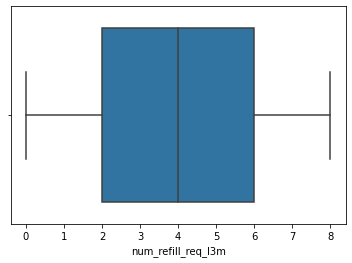

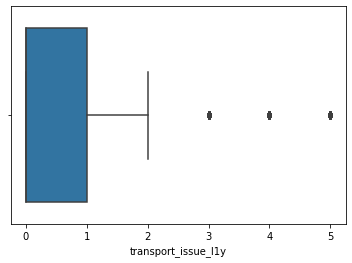

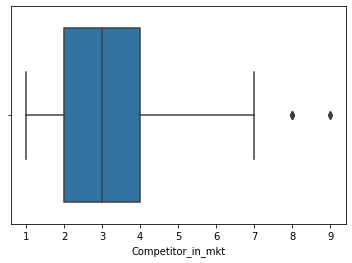

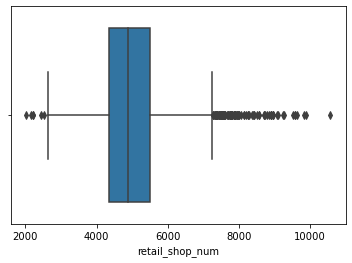

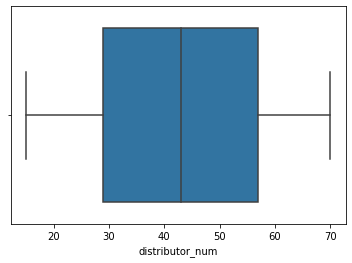

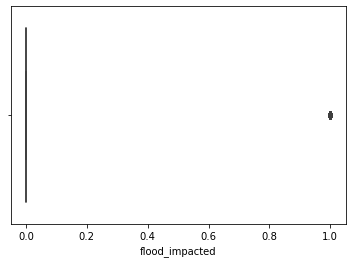

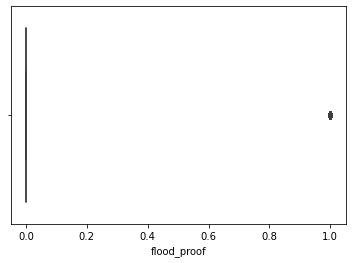

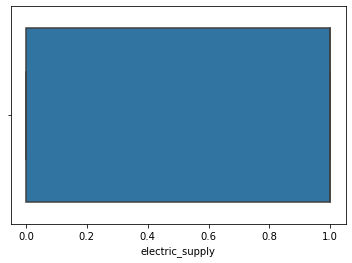

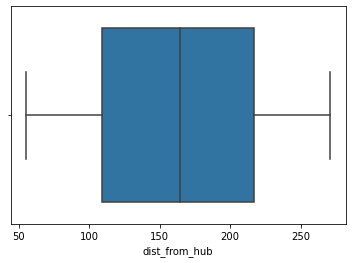

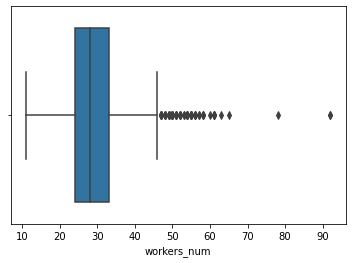

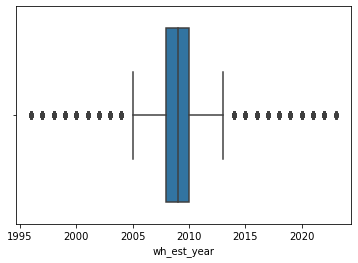

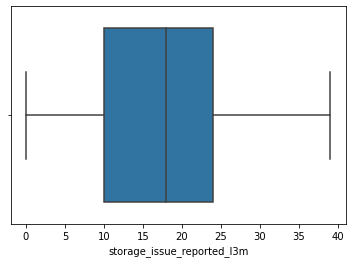

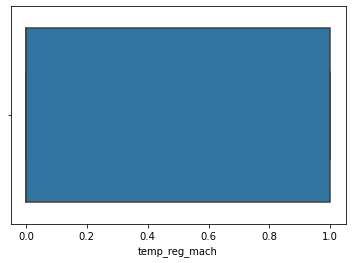

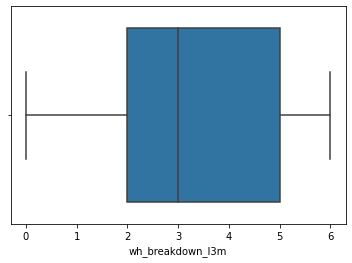

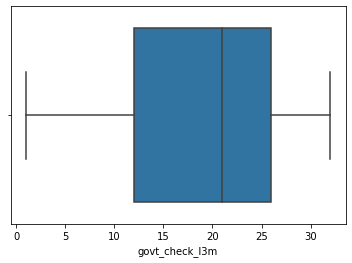

In [20]:
for col in df1.describe().columns:
    sns.boxplot(df1[col])
    plt.show()

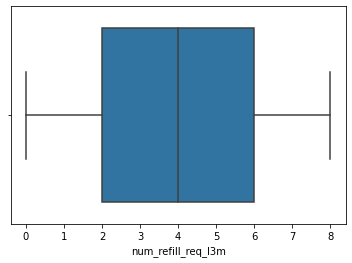

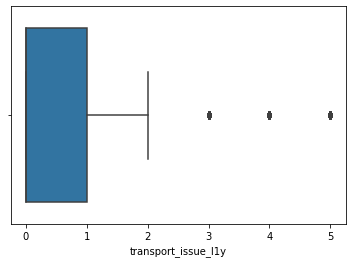

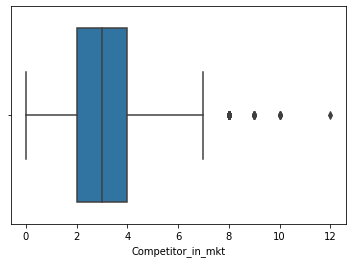

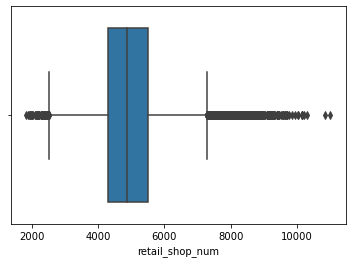

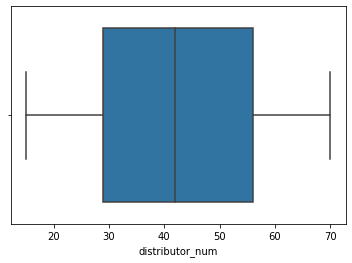

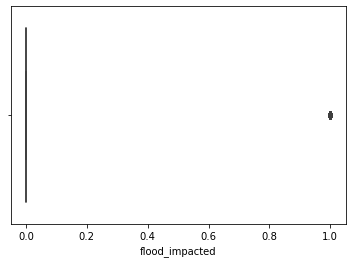

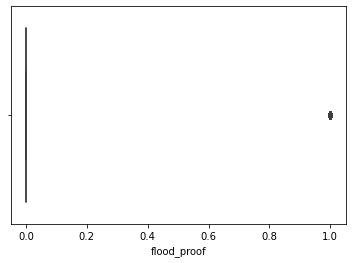

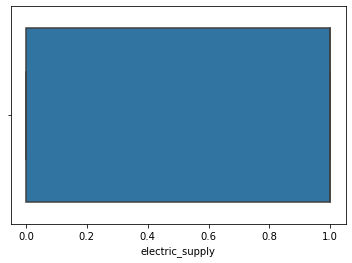

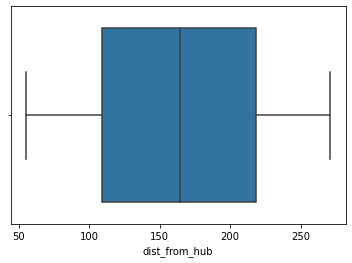

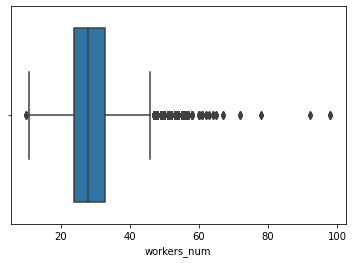

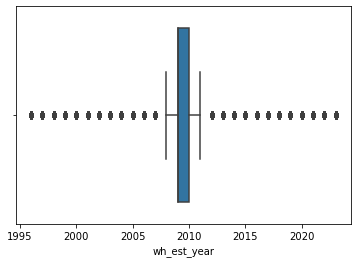

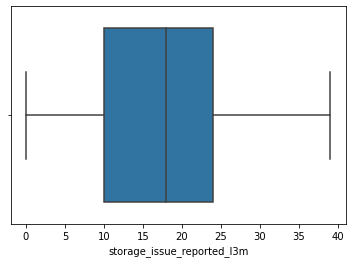

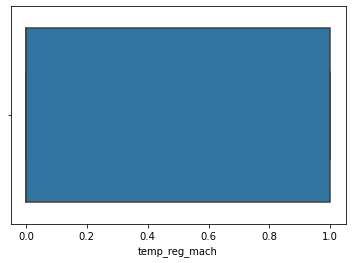

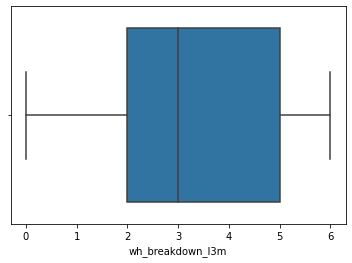

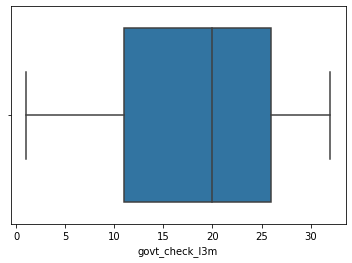

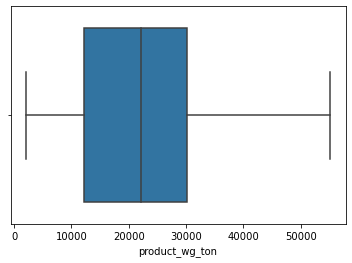

In [21]:
# Outlier Detection on train data:
for col in df.describe().columns:
    sns.boxplot(df[col])
    plt.show()

In [22]:
#Outlier treatment on train data:
col_sel=['transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','flood_impacted','flood_proof','workers_num','wh_est_year']
def iqr_capping(df, cols, factor):
    
    for col in cols:
        
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                 np.where(df[col]<lower_whisker, lower_whisker, df[col]))


iqr_capping(df, col_sel, 1.5)

In [23]:
#Outlier treatment on test data:
col_sel=['transport_issue_l1y','Competitor_in_mkt','retail_shop_num','distributor_num','flood_impacted','flood_proof','workers_num','wh_est_year']
def iqr_capping(df1, cols, factor):
    
    for col in cols:
        
        q1 = df1[col].quantile(0.25)
        q3 = df1[col].quantile(0.75)
        
        iqr = q3 - q1
        
        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)
        
        df1[col] = np.where(df1[col]>upper_whisker, upper_whisker,
                 np.where(df1[col]<lower_whisker, lower_whisker, df1[col]))


iqr_capping(df1, col_sel, 1.5)

# Feature Engineering:

In [24]:
#Train data:

df['New_Wh_breakdown']=(df['wh_breakdown_l3m']+df['govt_check_l3m'])

In [25]:
df['New_wh_est_year']=(df['wh_est_year']+df['workers_num'])

In [26]:
#Adding new features to test data:
# to balance the both train and test datasets
df1['New_Wh_breakdown']=(df1['wh_breakdown_l3m']+df1['govt_check_l3m'])
df1['New_wh_est_year']=(df1['wh_est_year']+df1['workers_num'])

# 3. Data Preparation
Data Preparation Let's now prepare the data and build the model.

In [27]:
df1.select_dtypes(include = ['object']).columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [28]:
df1.select_dtypes(include = ['int64','float']).columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'New_Wh_breakdown', 'New_wh_est_year'],
      dtype='object')

# OneHotEncoding on test data:

In [29]:
#creating dummies to categorical variables.
#converting categorical to numerical.
df1= pd.get_dummies(df1,columns = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'], drop_first = True)

In [30]:
df1.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

# OneHotEncoding on train data:

In [31]:
#creating dummies to categorical variables.
#converting categorical to numerical.
df_new= pd.get_dummies(df,columns = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'], drop_first = True)

In [32]:
df_new.drop(['Ware_house_ID','WH_Manager_ID'],axis=1,inplace=True)

In [33]:
#Training Data:
comatrix=df_new.corr()


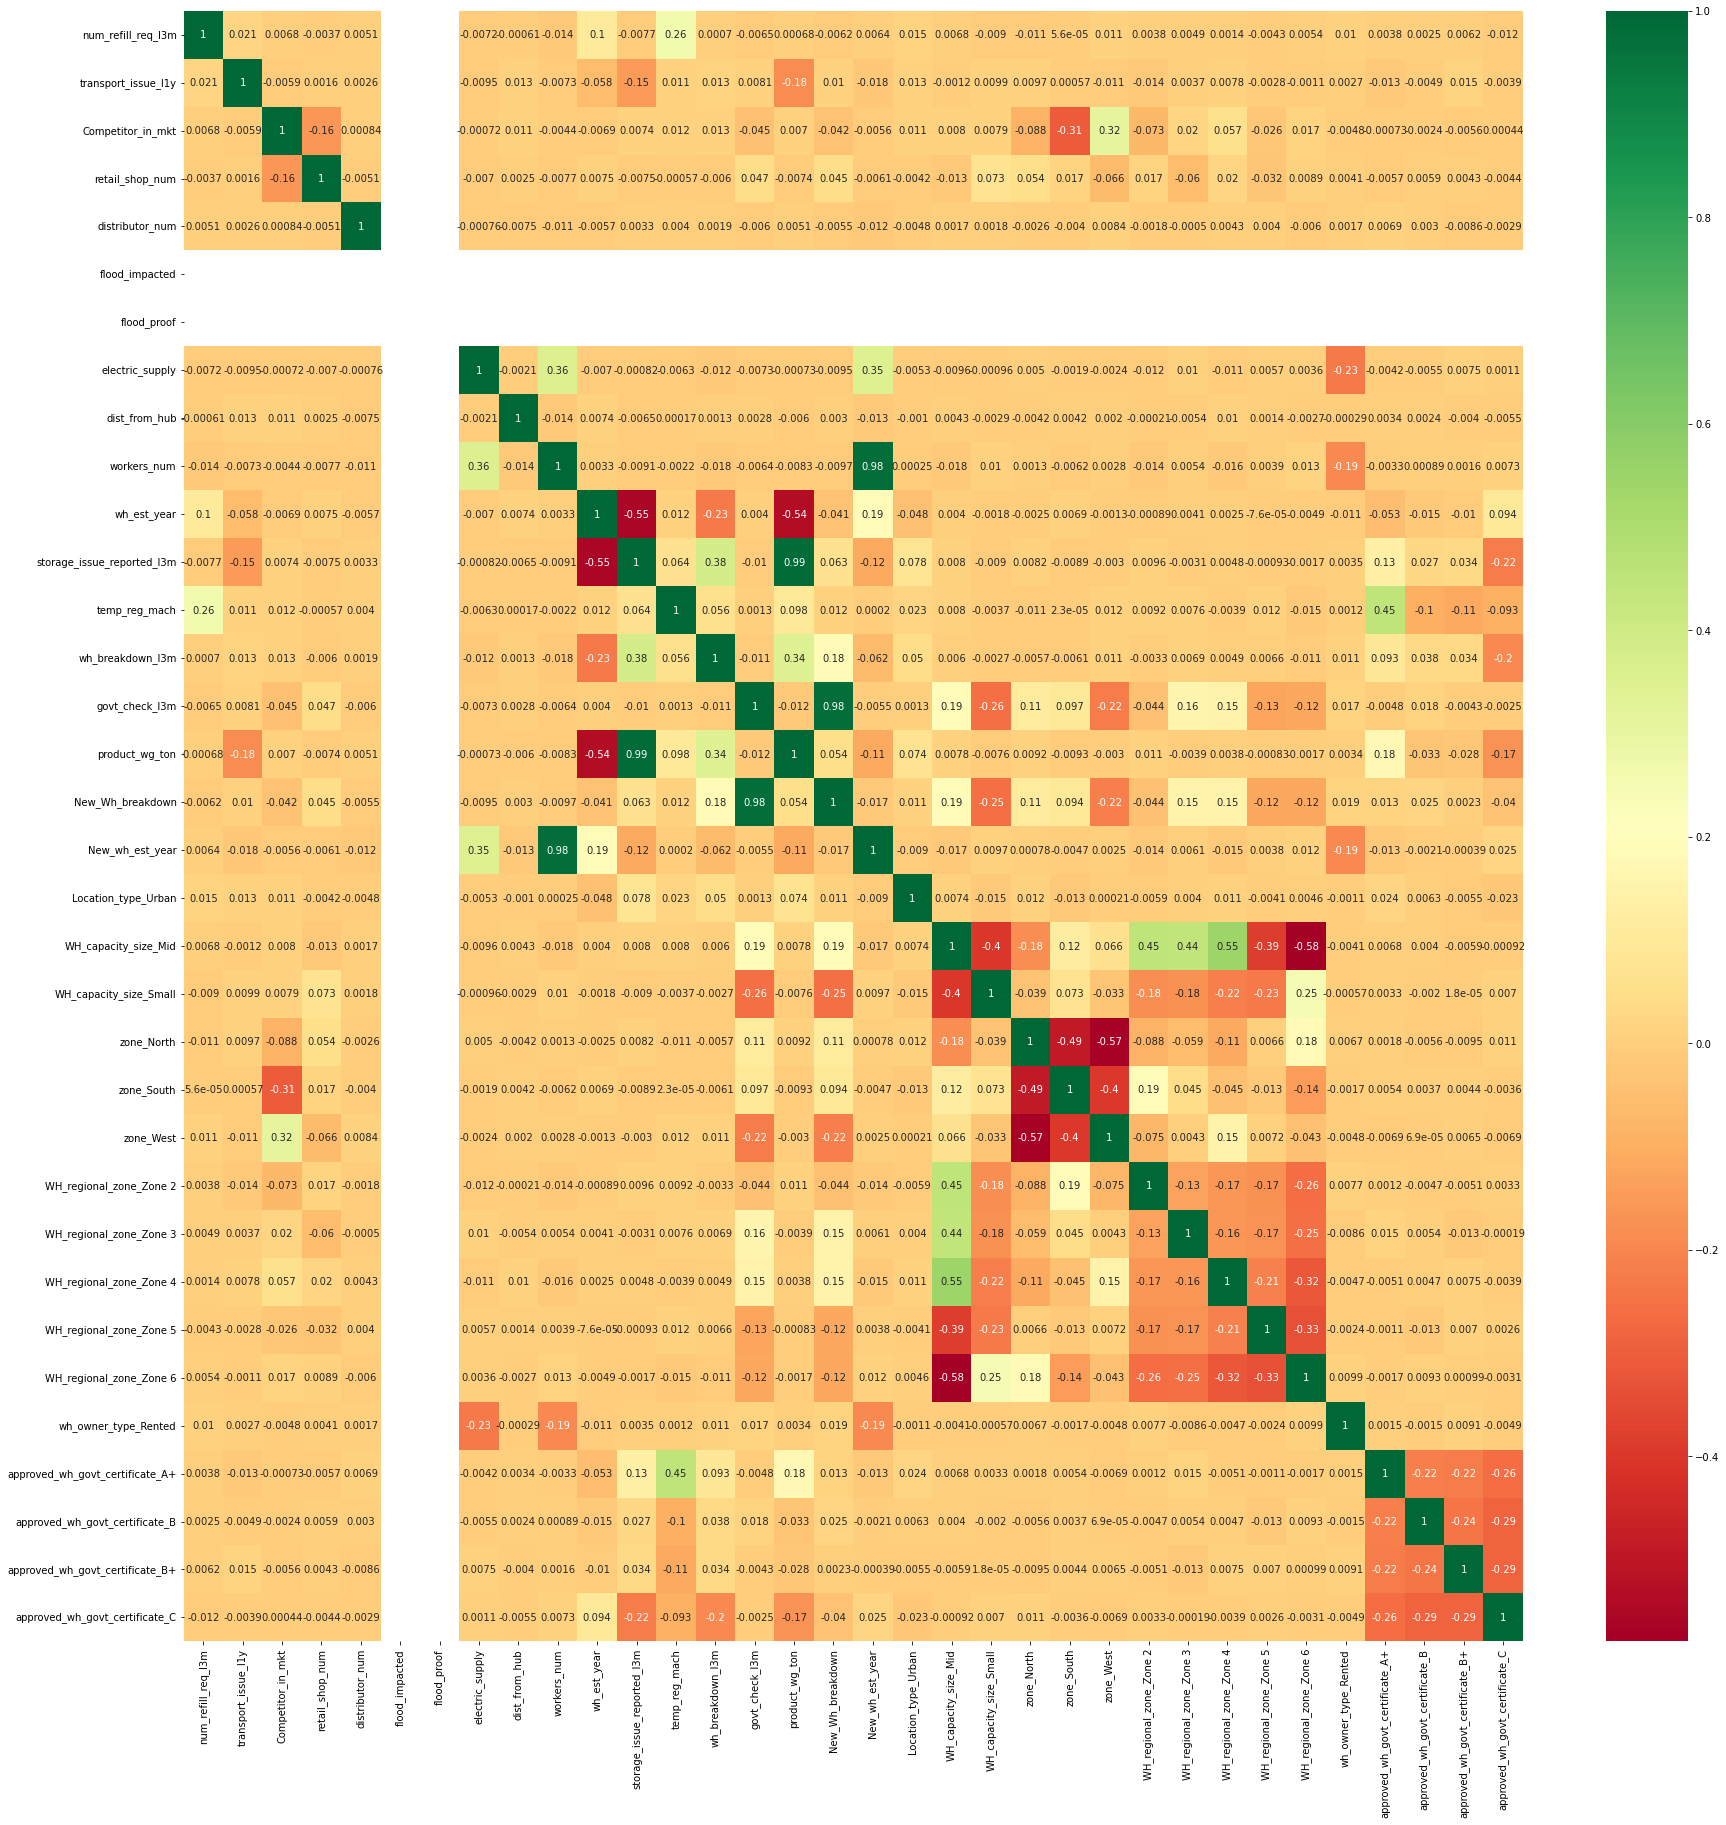

In [34]:
#Training Data:
#Checking correlation between variables
top_corr_feat=comatrix.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df_new[top_corr_feat].corr(),annot=True,cmap='RdYlGn')



# Correlation of testing dataset:-

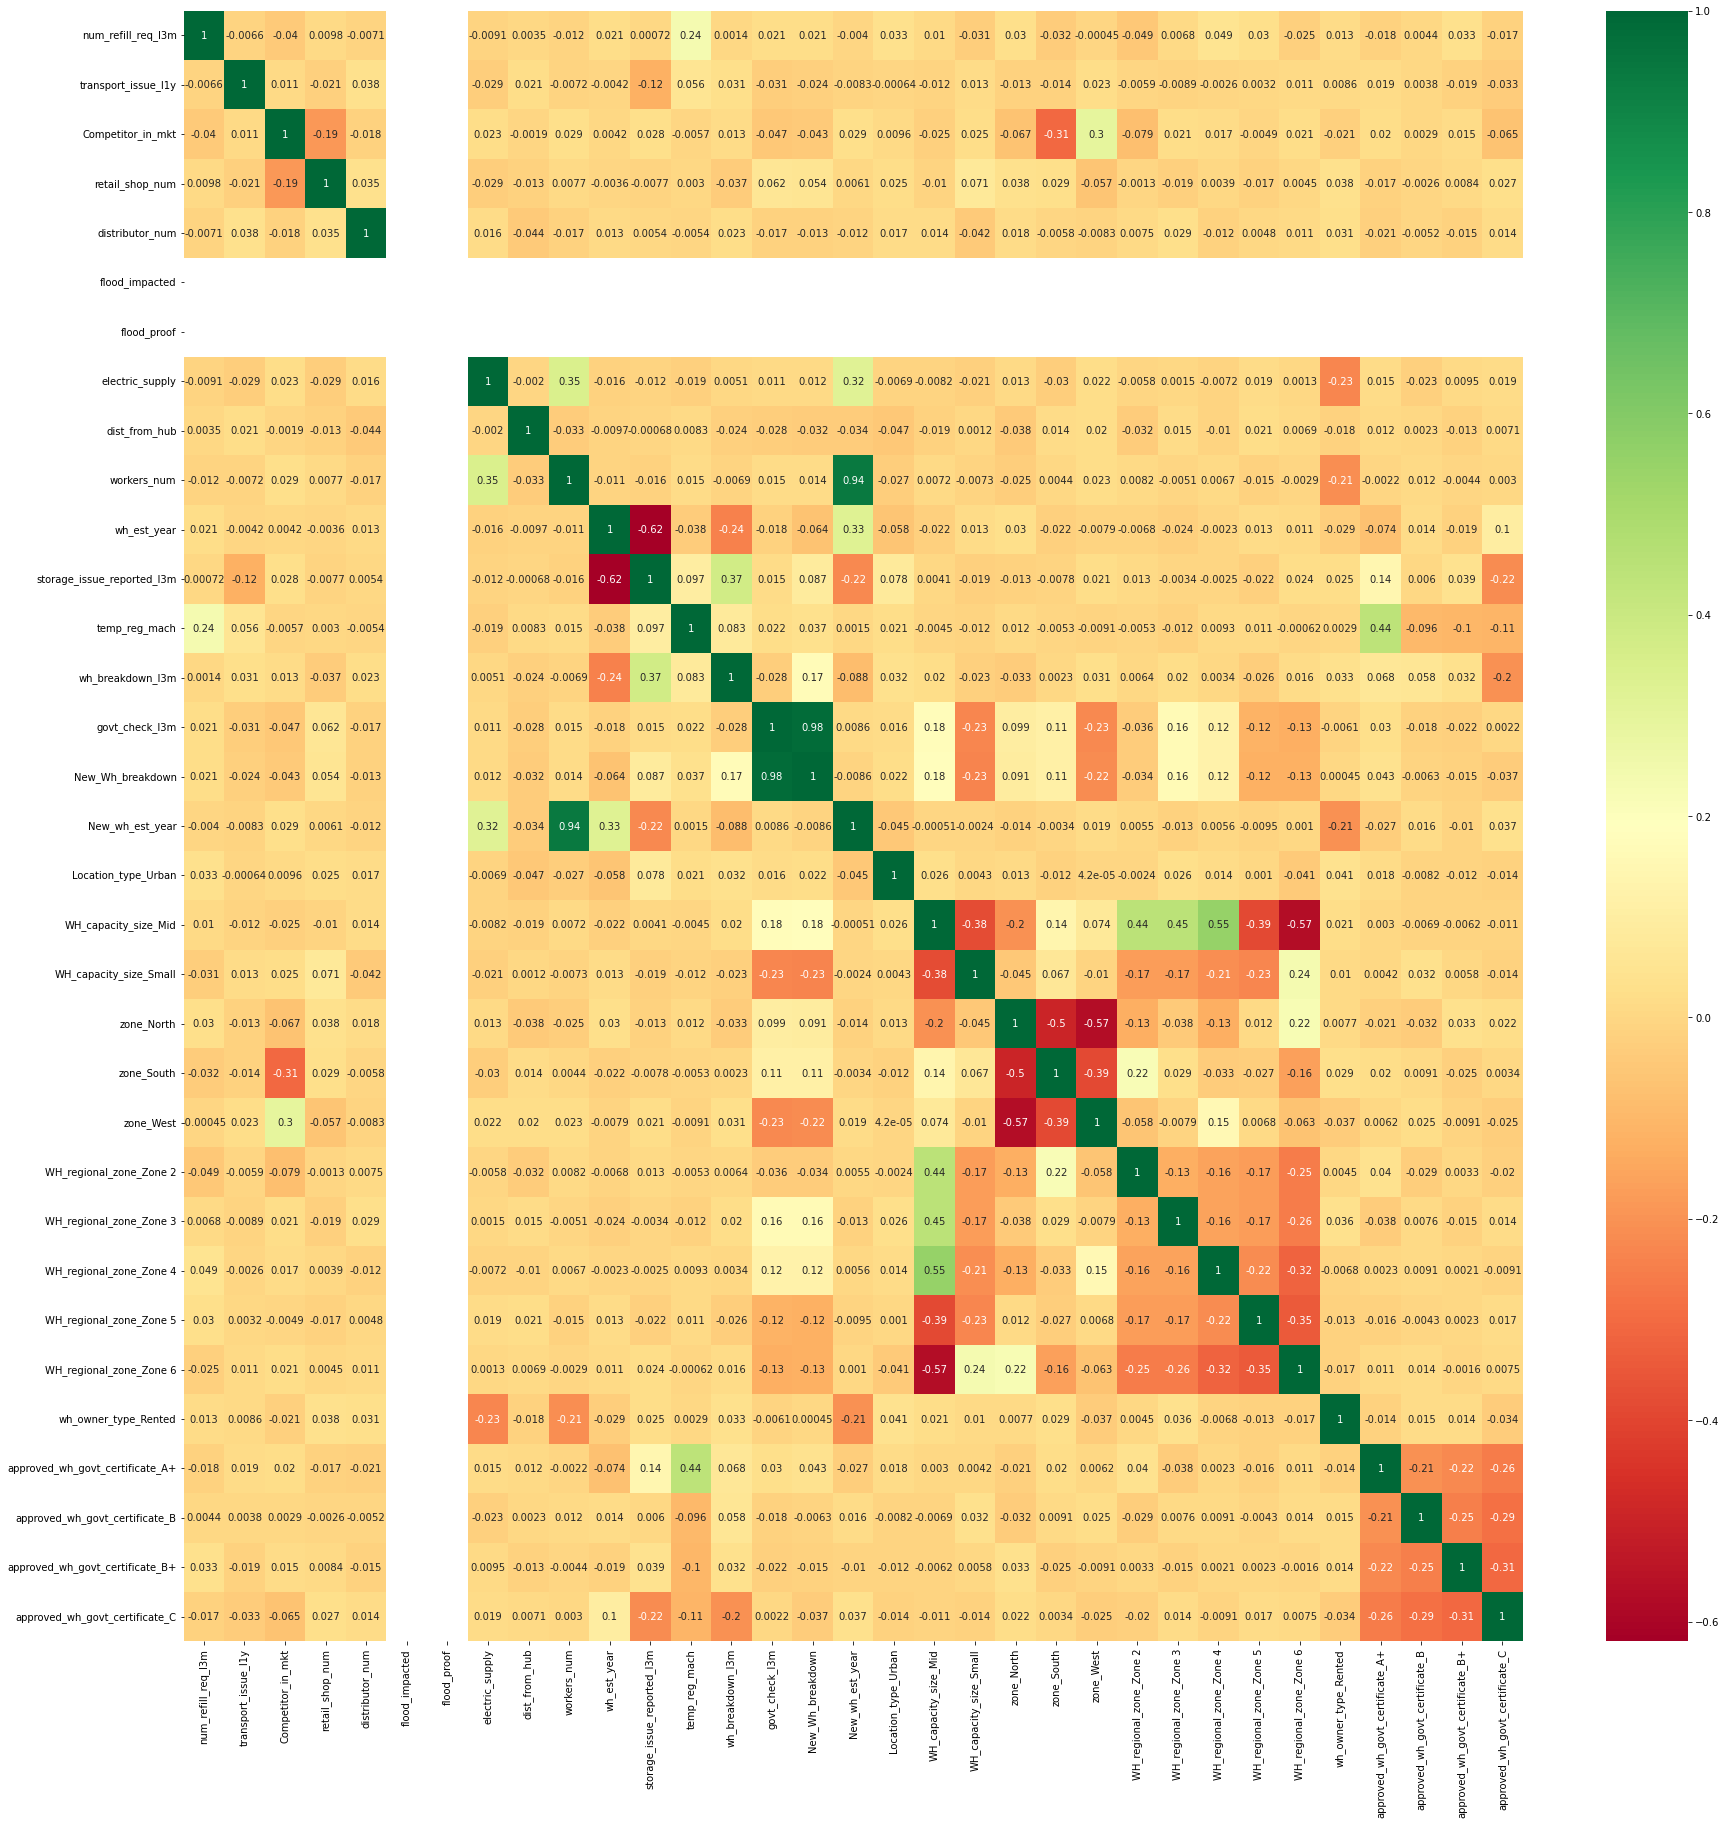

In [35]:
#Testing Data:
comatrix=df1.corr()
#Training Data:
top_corr_feat=comatrix.index
plt.figure(figsize=(30,30))
g=sns.heatmap(df1[top_corr_feat].corr(),annot=True,cmap='RdYlGn')


# VIF calculation
A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results

In [36]:
# Let's check multicollinearity 
# to calculated VIF we can use the loop
Default_indep=df_new.loc[:,df_new.columns!='product_wg_ton']

import statsmodels.api as sm
features=list(Default_indep.columns)
for i in range(1, len(Default_indep.columns)):
    x=Default_indep.loc[:,Default_indep.columns!=features[i]]
    y=Default_indep.loc[:,Default_indep.columns==features[i]]
    model=sm.OLS(y,x)
    results=model.fit()

    rsq=results.rsquared
    vif=round(1/(1-rsq),2)
    print ("R-Sqr value of {} is {}".format(features[i],rsq))
    print ('VIF for {} is {}'.format(features[i],vif))

R-Sqr value of transport_issue_l1y is 0.3603612500039106
VIF for transport_issue_l1y is 1.56
R-Sqr value of Competitor_in_mkt is 0.9094163374497056
VIF for Competitor_in_mkt is 11.04
R-Sqr value of retail_shop_num is 0.9648369590292223
VIF for retail_shop_num is 28.44
R-Sqr value of distributor_num is 0.8745747919588174
VIF for distributor_num is 7.97
R-Sqr value of flood_impacted is nan
VIF for flood_impacted is nan
R-Sqr value of flood_proof is nan
VIF for flood_proof is nan
R-Sqr value of electric_supply is 0.7090961279978788
VIF for electric_supply is 3.44
R-Sqr value of dist_from_hub is 0.8722214785424834
VIF for dist_from_hub is 7.83
R-Sqr value of workers_num is 1.0
VIF for workers_num is inf
R-Sqr value of wh_est_year is 1.0
VIF for wh_est_year is inf
R-Sqr value of storage_issue_reported_l3m is 0.8209417576143743
VIF for storage_issue_reported_l3m is 5.58
R-Sqr value of temp_reg_mach is 0.4932798035597098
VIF for temp_reg_mach is 1.97
R-Sqr value of wh_breakdown_l3m is 1.0
VIF

# We see high multicollinearity with features, can treat them with PCA or iterative metho

In [37]:
#We can reduce the multicollinearity with PCA 

from sklearn.decomposition import PCA
pca=PCA()
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(Default_indep)
scaled_df=scalar.transform(Default_indep)
# finding the PCA
PCA_result=pca.fit(scaled_df)
PCA_result.components_

array([[-2.45416328e-03, -1.40107966e-03,  4.49475725e-02, ...,
        -1.54185807e-02,  1.20095567e-03,  3.42066848e-02],
       [ 1.57637355e-03, -1.65873181e-04, -6.13664816e-03, ...,
        -1.81244164e-02, -1.54328969e-02,  1.22250303e-01],
       [ 2.17051025e-02, -6.37168007e-03,  2.14028708e-01, ...,
        -2.63497374e-02, -4.47862081e-03,  5.85664658e-02],
       ...,
       [-0.00000000e+00,  4.46694449e-17,  5.20158523e-17, ...,
        -6.55472167e-18, -1.73373750e-16, -1.24114418e-16],
       [-0.00000000e+00,  4.81323332e-17, -4.67809539e-18, ...,
         3.36984502e-17,  2.33032345e-16,  9.64586130e-17],
       [ 0.00000000e+00,  1.34283790e-16,  9.20215722e-17, ...,
         1.07906094e-16,  6.66786827e-17,  5.31276895e-17]])

In [38]:
PCA_result.explained_variance_

array([2.83578134e+00, 2.34282413e+00, 2.14778602e+00, 1.97815624e+00,
       1.72349406e+00, 1.59440540e+00, 1.43593777e+00, 1.30977039e+00,
       1.24427073e+00, 1.22164331e+00, 1.18021904e+00, 1.04565792e+00,
       1.03033634e+00, 1.01300906e+00, 1.00259937e+00, 9.88310257e-01,
       9.72006236e-01, 9.58627263e-01, 9.28259149e-01, 7.80673263e-01,
       7.43319381e-01, 7.22931911e-01, 5.82137308e-01, 5.28758944e-01,
       3.69850450e-01, 2.28888127e-01, 6.77265085e-02, 2.40196753e-02,
       5.59259259e-31, 1.97237799e-31, 2.50634092e-32, 1.45550732e-32,
       1.45550732e-32])

In [39]:
#Test Data:
print("The shape of the Testing Dataset is:",df1.shape)

The shape of the Testing Dataset is: (2750, 33)


In [40]:
#Train Data:
print("The shape of the Testing Dataset is:",df_new.shape)

The shape of the Testing Dataset is: (22150, 34)


# Train Test Split

In [41]:
#Trainig data:
x = df_new.drop('product_wg_ton',axis = 1)

In [42]:
y = df_new['product_wg_ton']

In [43]:
#Split the data into 80% train and 20% test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=10)

# LinearRegression:

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [45]:
lm=LinearRegression()

In [46]:
#Train Data:
lm.fit(x_train,y_train)
predit=lm.predict(x_test)

print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9850657580673705
MSE 2057507.1197886819


In [47]:
#TEST DATA:
lm.fit(x_test,y_test)
predit=lm.predict(x_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9851864076481025
MSE 2040885.0928739232


In [48]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predit))
print('MSE:', metrics.mean_squared_error(y_test, predit))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predit)))

MAE: 1024.7120674245832
MSE: 2040885.0928739232
RMSE: 1428.5954965888432


# RandomForestRegressor

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

#np.random.seed(42)

In [50]:
rfr=RandomForestRegressor(n_estimators=100)

In [51]:
#Train Data:
#np.random.seed(42)
rfr.fit(x_train,y_train)
predit=rfr.predict(x_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9937079864213183
MSE 866857.7082348984


In [52]:
#Test Data:
#np.random.seed(42)
rfr.fit(x_test,y_test)
predit=rfr.predict(x_test)
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9989613590219549
MSE 143094.72264293453


# xgboost:


In [53]:
#Train Data:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train,y_train)
predit=xg.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9937820812747455
MSE 856649.5778755435


In [54]:
#Test Data:
xg.fit(x_test,y_test)
predit=xg.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9992372785391554
MSE 105080.98390147228


# DecisiontreeRegressor

In [55]:
#Train Data:
from sklearn.tree import DecisionTreeRegressor
Des= DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.1, random_state = 0)
Des.fit(x_train,y_train)
predit=Des.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))



R_score is  0.947720614346059
MSE 7202589.102707989


In [56]:
#Test Data:
Des.fit(x_test,y_test)
predit=Des.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9478444997912768
MSE 7185521.267144331


# BaggingRegressor

In [57]:
#Train Data:
from sklearn.ensemble import BaggingRegressor
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
predit=model.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))



R_score is  0.9936865987286085
MSE 869804.3144452821


In [58]:
#Test Data:
model.fit(x_test,y_test)
predit=model.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.998936318701671
MSE 146544.55541638823


# KNeighborsRegressor

In [59]:
#TRain Data:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x_train,y_train)
predit=neigh.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))


R_score is  0.5108562263354448
MSE 67389881.68634312


In [60]:
#Test Data:
neigh.fit(x_test,y_test)
predit=neigh.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.7647021076326378
MSE 32417252.311907448


# GradientBoostingRegressor:

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(x_train, y_train)
predit=gbr.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))


R_score is  0.9936613329500977
MSE 873285.2088494046


In [62]:
#Test Data:
gbr.fit(x_test,y_test)
predit=gbr.predict(x_test)
from sklearn.metrics import r2_score
print("R_score is ",r2_score(y_test,predit))
print("MSE",mean_squared_error(y_test,predit))

R_score is  0.9941635871385002
MSE 804089.0907442099


# model evaluation parameters

# Make the Prediction for test data:

In [63]:
# Top three models are GradientBoosting,XGB,RandomForest

In [64]:
# Test data shape
df1.shape

(2750, 33)

In [65]:
# Train data shape
x.shape

(22150, 33)

In [66]:
# using RandomForestRegressor to predict results.
predit=rfr.predict(df1)


In [67]:
predit[:10]

array([12694.05, 32034.34, 27919.54, 19711.3 , 25951.43,  6369.25,
       34746.99, 22352.47, 22728.73, 32721.46])

In [68]:
# using Linear regression model to predict the results 
predit=lm.predict(df1)

In [69]:
predit[:10]

array([13945.71621824, 31739.90042278, 29571.52778402, 20039.07575587,
       25742.53191696,  8104.5265063 , 34065.69639658, 23232.43433555,
       23979.68581426, 32355.62252981])

In [70]:
#Linear regression model not giving very accurate results 
#Linear regression R_score is  0.9850657580673705 and MSE 2057507.1197886819

In [71]:
# using XGB model to predict the results

predit=xg.predict(df1)

In [72]:
predit[:10]

array([12467.76  , 31879.781 , 28123.344 , 19871.959 , 26411.416 ,
        6310.2627, 34729.562 , 22819.492 , 23052.799 , 32630.475 ],
      dtype=float32)

In [73]:
# using GradientBoosting model to predict the results
predit=gbr.predict(df1)

In [74]:
predit[:10]

array([12602.36939146, 31594.5229533 , 28381.95430946, 19689.80835701,
       25690.96110075,  6488.7086705 , 34438.15951805, 22812.55086047,
       23053.63226774, 32311.13979738])